In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [42]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [91]:
import numpy as np
import pandas as pd
#from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# MNIST Image --> Tensors
transform = transforms.ToTensor()
# Train data
train_data = datasets.MNIST(root='C:/Users/ataas/Downloads/udemy/data', train=True, download=True, transform=transform)

In [45]:
# Test data
test_data = datasets.MNIST(root='C:/Users/ataas/Downloads/udemy/data', train=False, download=True, transform=transform)

In [46]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:/Users/ataas/Downloads/udemy/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [47]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:/Users/ataas/Downloads/udemy/data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [48]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [49]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [50]:
image, label = train_data[0]

In [51]:
image.shape

torch.Size([1, 28, 28])

In [52]:
label

5

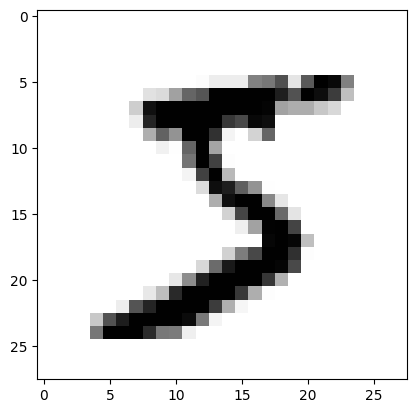

In [53]:
plt.imshow(image.squeeze(), cmap='gist_yarg')

In [54]:
torch.manual_seed(101)

# 0 images, 1 images, ...
train_loader = DataLoader(train_data, batch_size=100, shuffle=True) # dataset will be shuffled after each epoch

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [55]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # Formatting the spacings

In [56]:
# FIRST BATCH
for images,labels in train_loader:
    # 60000 images / 100 batch size = 60 times
    break # to take only 1st batch

In [57]:
images.shape

torch.Size([100, 1, 28, 28])

In [58]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


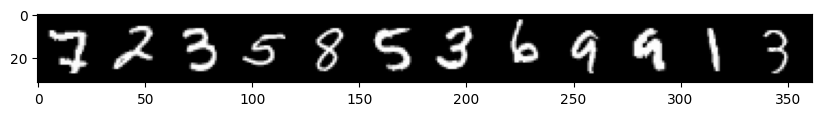

In [59]:
#print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Showing the first 12 images
im = make_grid(images[:12], nrow=12) # the default nrow is 8
plt.figure(figsize=(10,4))
# transpose to width, height and color channel
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
plt.show()

In [60]:
class MultilayerPerceptron(nn.Module):
    # input= 28x28 image, output= 0,..,9 ten digits, one hidden layer 120 neurons, the other 84 neurons
    def __init__(self, input_size=784, out_size=10, layers=[120, 84]):

        super().__init__()

        self.fc1 = nn.Linear(input_size, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_size)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1) # Multi Class Classification

In [61]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [62]:
# Artificial Neural Network --> Convolutional Neural Network
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [63]:
# 105,214 total parameters (too much, tw CNN)

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [65]:
images.shape ## --> [100, 784]

torch.Size([100, 1, 28, 28])

In [66]:
images.view(100,-1).shape # Combine the last dimension to 1 dimension

torch.Size([100, 784])

In [ ]:
import time
start_time = time.time()

# Training

epochs = 10
# Keeping track of training
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for batch, (X_train, y_train) in enumerate(train_loader):
        batch += 1

        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)
        

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum() # num of corrects
        train_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 200 == 0:
            accuracy = train_corr.item()*100 / (100*batch)
            print(f'Epoch:{i}, batch:{batch}, loss:{loss.item()}, accuracy:{accuracy}')

    train_losses.append(loss.detach().numpy())
    train_correct.append(train_corr)

    with torch.no_grad(): # like the model sees the data for the  first time

        for batch, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500,-1))

            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted==y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.detach().numpy())
    test_correct.append(test_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time / 60} mins')

Epoch:0, batch:200, loss:0.23541299998760223, accuracy:83.25
Epoch:0, batch:400, loss:0.35372811555862427, accuracy:87.5275
Epoch:0, batch:600, loss:0.13645224273204803, accuracy:89.57333333333334
Epoch:1, batch:200, loss:0.2445889711380005, accuracy:94.84
Epoch:1, batch:400, loss:0.14444687962532043, accuracy:95.055
Epoch:1, batch:600, loss:0.07348385453224182, accuracy:95.355
Epoch:2, batch:200, loss:0.08567597717046738, accuracy:96.54
Epoch:2, batch:400, loss:0.06055755168199539, accuracy:96.6425
Epoch:2, batch:600, loss:0.062045298516750336, accuracy:96.71833333333333
Epoch:3, batch:200, loss:0.11591555923223495, accuracy:97.64
Epoch:3, batch:400, loss:0.05804160609841347, accuracy:97.475
Epoch:3, batch:600, loss:0.0296296626329422, accuracy:97.485
Epoch:4, batch:200, loss:0.11474043875932693, accuracy:98.185
Epoch:4, batch:400, loss:0.04435558244585991, accuracy:98.04
Epoch:4, batch:600, loss:0.05232115089893341, accuracy:98.05166666666666
Epoch:5, batch:200, loss:0.00892622116953

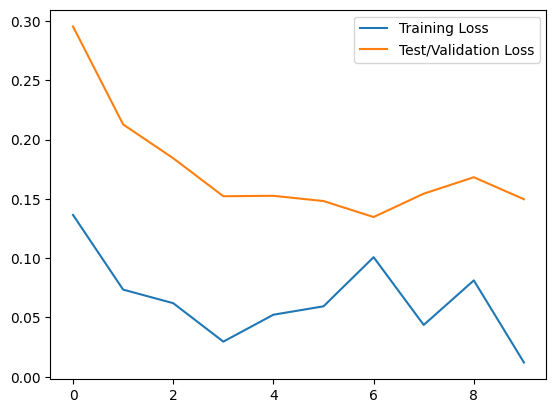

In [69]:
fig, ax = plt.subplots()
ax.plot(train_losses, label='Training Loss')
ax.plot(test_losses, label='Test/Validation Loss')
ax.legend()

In [73]:
#Percentage of correct by epochs
train_acc = [correct/600 for correct in train_correct]

In [74]:
train_acc

[tensor(89.5733),
 tensor(95.3550),
 tensor(96.7183),
 tensor(97.4850),
 tensor(98.0517),
 tensor(98.4017),
 tensor(98.6950),
 tensor(98.9183),
 tensor(99.1717),
 tensor(99.3000)]

In [75]:
test_acc = [correct/100 for correct in test_correct]

In [76]:
test_acc

[tensor(94.3500),
 tensor(95.9100),
 tensor(96.8800),
 tensor(96.9900),
 tensor(97.4700),
 tensor(97.6000),
 tensor(97.8800),
 tensor(97.6000),
 tensor(97.6400),
 tensor(97.6400)]

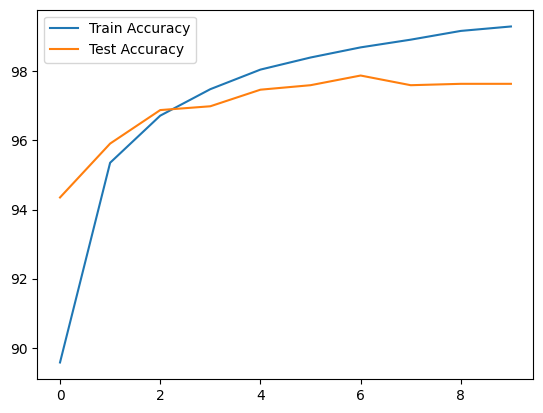

In [77]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.legend()

In [80]:
# NEW UNSEEN DATA

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [81]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted==y_test).sum()


In [84]:
100*correct.item()/len(test_data)

97.64

In [92]:
#confusion_matrix(predicted.view(-1), y_test.view(-1))

In [93]:
# Examine the misses
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i).astype('int64')

len(misses)

236

In [94]:
misses[:10]

array([  18,   80,  149,  151,  247,  259,  321,  340,  381,  445])